# Worksheet 16

Name:  
UID: 

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

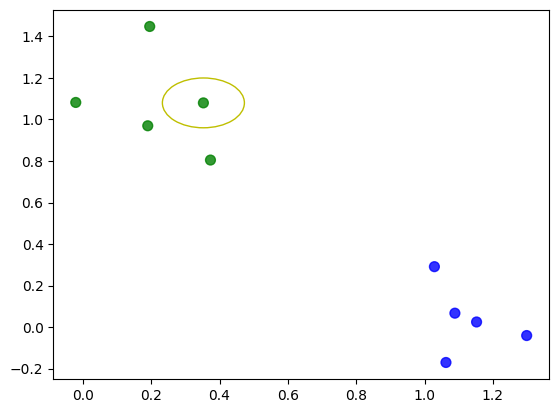

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <= 0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    ...
    return

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    ...
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [4]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def predict(alpha_i, b, X, kernel, params, x):
    prediction = b
    for i in range(len(X)):
        prediction += alpha_i[i] * kernel(X[i], x, *params)
    return prediction

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Reduce n (Decrease Polynomial Degree): Overfitting can occur when the polynomial degree is too high. High degrees can create complex decision boundaries that may fit the noise in the data. By reducing the value of n, you can make the decision boundary less complex and reduce overfitting. Try different lower values for n to see if it results in better generalization.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

Increase sigma (Decrease Gamma): A small sigma value results in a highly localized and complex decision boundary. By increasing sigma, you make the kernel function more smooth and the decision boundary less localized. This can help the SVM capture more complex patterns in the data, potentially reducing underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

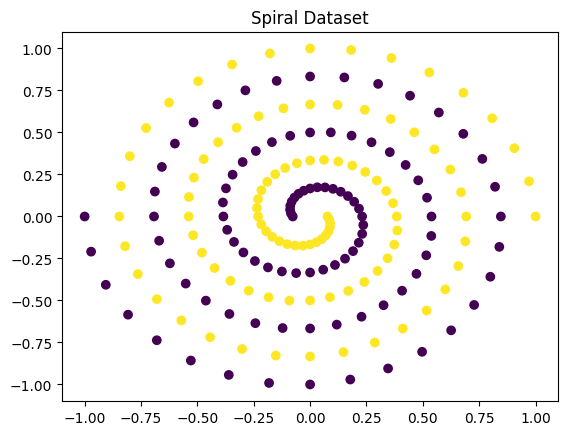

Test Accuracy: 0.4745762711864407


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

# Visualize the dataset
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Spiral Dataset")
plt.show()

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Choose a kernel function and tune its parameters (e.g., RBF kernel with gamma parameter)
best_accuracy = 0
best_gamma = None

for gamma in [0.001, 0.01, 0.1, 1, 10]:
    # Create and train the SVM model
    model = svm.SVC(kernel='rbf', gamma=gamma)
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this gamma value gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gamma = gamma

# Train the final SVM model with the best gamma value
final_model = svm.SVC(kernel='rbf', gamma=best_gamma)
final_model.fit(x_train, y_train)

# Evaluate the final model on the test set
y_pred = final_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)